# Airline Dataset Modeling

## TODO 

* [ ] Support Vector Machine
* [ ] Gradient Boosting

As we said in the Project Proposal, we will use two types of Machine Learning Algorithms: Support Vector Machine and Gradient Boosting. In the this step, we are gonna test some parameterizations of this algorithms.

## Import Libraries

In [65]:
import os
from datetime import datetime
import logging
_ABSOLUTE_DIR = os.getcwd()
import typing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import math
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pickle

## Get Processed Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving airline_test__processed.csv to airline_test__processed (1).csv
Saving airline_train__processed.csv to airline_train__processed (1).csv


In [3]:
df_airline_train_processed = pd.read_csv('airline_train__processed.csv')
df_airline_test_processed = pd.read_csv('airline_test__processed.csv')

## Dataframes into variables

In [4]:
train_data = df_airline_train_processed
val_data = df_airline_test_processed
train_100_samples = train_data.sample(n=100, random_state=42)
val_100_samples = val_data.sample(n=100, random_state=42)
train_200_samples = train_data.sample(n=200, random_state=42)
val_200_samples = val_data.sample(n=200, random_state=42)

## Support Vector Machine

### Train with 100 samples

In [ ]:
import warnings
warnings.filterwarnings("ignore")
kernels_params = ['linear','poly','rbf']
C_params = np.linspace(0.001,10,num=40)


trainX_100 =  train_100_samples.loc[ : , train_100_samples.columns != 'satisfaction']
valX_100 =  val_100_samples.loc[ : , val_100_samples.columns != 'satisfaction']
trainY_100 = train_100_samples.loc[ : , train_100_samples.columns == 'satisfaction']
valY_100 = val_100_samples.loc[ : , val_100_samples.columns == 'satisfaction']
kernels = []
Cs = []
recalls = []
accuracys_train = []
accuracys_val = []
recalls = []
mean_cross_vals = []
f1s = []
for i in kernels_params:
    for j in C_params:
        svm_model = svm.SVC(kernel = i, C=j)
        svm_model.fit(trainX_100,trainY_100)
        svm_pred_train= svm_model.predict(trainX_100)
        svm_pred_val = svm_model.predict(valX_100)
        f1= f1_score(valY_100, svm_pred_val, average='macro')
        accuracy_val = accuracy_score(valY_100,svm_pred_val)
        accuracy_train = accuracy_score(trainY_100,svm_pred_train)
        cross_val_scores = cross_val_score(svm_model, valX_100,valY_100,cv=5).mean()
        recall = recall_score(valY_100,svm_pred_val)
        kernels.append(i)
        Cs.append(j)
        recalls.append(recall)
        accuracys_train.append(accuracy_train)
        accuracys_val.append(accuracy_val)
        mean_cross_vals.append(cross_val_scores)
        f1s.append(f1)
        print("-- For kernel = " + str(i) + " C= "+ str(j) + " -- check")
       


-- For kernel = linear C= 0.001 -- check
-- For kernel = linear C= 0.2573846153846154 -- check
-- For kernel = linear C= 0.5137692307692308 -- check
-- For kernel = linear C= 0.7701538461538461 -- check
-- For kernel = linear C= 1.0265384615384614 -- check
-- For kernel = linear C= 1.2829230769230768 -- check
-- For kernel = linear C= 1.539307692307692 -- check
-- For kernel = linear C= 1.7956923076923075 -- check
-- For kernel = linear C= 2.052076923076923 -- check
-- For kernel = linear C= 2.3084615384615383 -- check
-- For kernel = linear C= 2.5648461538461538 -- check
-- For kernel = linear C= 2.821230769230769 -- check
-- For kernel = linear C= 3.077615384615384 -- check
-- For kernel = linear C= 3.3339999999999996 -- check
-- For kernel = linear C= 3.590384615384615 -- check
-- For kernel = linear C= 3.8467692307692305 -- check
-- For kernel = linear C= 4.103153846153846 -- check
-- For kernel = linear C= 4.359538461538461 -- check
-- For kernel = linear C= 4.615923076923077 -- c

In [ ]:
analyse = {'Kernel parameter': kernels ,
        'C parameter': Cs,
        'Accuracy Training set': accuracys_train,
        'Accuracy Validation set': accuracys_val,
        'Recall score': recalls,
        'F1 score': f1s,
        'Mean Cross Validation': mean_cross_vals,
        }

analyses_100_samples = pd.DataFrame(analyse)
analyses_100_samples.sort_values(by=['Accuracy Validation set'],ascending=False)

,Kernel parameter,C parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
29,linear,7.436154,0.71,0.81,0.784314,0.809981,0.81
9,linear,2.308462,0.71,0.81,0.784314,0.809981,0.82
24,linear,6.154231,0.67,0.81,0.745098,0.809524,0.84
27,linear,6.923385,0.71,0.81,0.784314,0.809981,0.83
14,linear,3.590385,0.71,0.81,0.784314,0.809981,0.80
...,...,...,...,...,...,...,...
65,poly,6.410615,0.61,0.49,0.000000,0.328859,0.43
64,poly,6.154231,0.61,0.49,0.000000,0.328859,0.43
63,poly,5.897846,0.61,0.49,0.000000,0.328859,0.43
62,poly,5.641462,0.61,0.49,0.000000,0.328859,0.43


In [58]:
import warnings
warnings.filterwarnings("ignore")
train_dataX= train_data.loc[ : , train_data.columns != 'satisfaction']
train_dataY= train_data.loc[ : , train_data.columns == 'satisfaction']
val_dataX= val_data.loc[ : , val_data.columns != 'satisfaction']
val_dataY= val_data.loc[ : , val_data.columns == 'satisfaction']
svm_best = BaggingClassifier(LinearSVC(C= 6.923385), max_samples=1.0 / 10, n_estimators=10, n_jobs=-1)
svm_best.fit(train_dataX,train_dataY)
svm_pred_train= svm_best.predict(train_dataX)
svm_pred_val = svm_best.predict(val_dataX)
f1= f1_score(val_dataY, svm_pred_val, average='macro')
accuracy_val = accuracy_score(val_dataY,svm_pred_val)
accuracy_train = accuracy_score(train_dataY,svm_pred_train)
cross_val_scores = cross_val_score(svm_best, val_dataX,val_dataY,cv=5).mean()
recall = recall_score(val_dataY,svm_pred_val)

In [10]:
analyse_best_one_svm = {'Kernel parameter': np.array(['linear']) ,
        'C parameter': np.array([6.923385]) ,
        'Accuracy Training set': np.array([accuracy_train]),
        'Accuracy Validation set': np.array([accuracy_val]),
        'Recall score': np.array([recall]),
        'F1 score': np.array([f1]),
        'Mean Cross Validation': np.array([cross_val_scores]),
        }

analyse_best_one = pd.DataFrame(analyse_best_one_svm)

In [11]:
analyse_best_one

,Kernel parameter,C parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
0,linear,6.923385,0.758032,0.75753,0.674723,0.750794,0.670327


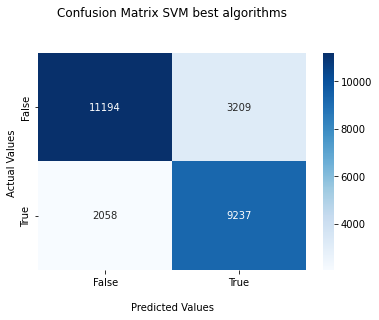

In [59]:
cf_matrix_svm= confusion_matrix(val_dataY, svm_pred_val)

ax = sns.heatmap(cf_matrix_svm,annot = True,fmt = 'g', cmap='Blues')

ax.set_title('Confusion Matrix SVM best algorithms\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [60]:
print("% of True elements well classified: ", 9237/(8528+2058))
print("% of False elements well classified: ", 11194/(11194+3209))

% of True elements well classified:  0.8725675420366522
% of False elements well classified:  0.7771991946122335


In [18]:
svm_best = BaggingClassifier(LinearSVC(C= 6.154231), max_samples=1.0 / 10, n_estimators=10, n_jobs=-1)
svm_best.fit(train_dataX,train_dataY)
svm_pred_train= svm_best.predict(train_dataX)
svm_pred_val = svm_best.predict(val_dataX)
f1= f1_score(val_dataY, svm_pred_val, average='macro')
accuracy_val = accuracy_score(val_dataY,svm_pred_val)
accuracy_train = accuracy_score(train_dataY,svm_pred_train)
cross_val_scores = cross_val_score(svm_best, val_dataX,val_dataY,cv=5).mean()
recall = recall_score(val_dataY,svm_pred_val)

In [19]:
analyse_best_two_svm = {'Kernel parameter': np.array(['linear']) ,
        'C parameter': np.array([6.154231]) ,
        'Accuracy Training set': np.array([accuracy_train]),
        'Accuracy Validation set': np.array([accuracy_val]),
        'Recall score': np.array([recall]),
        'F1 score': np.array([f1]),
        'Mean Cross Validation': np.array([cross_val_scores]),
        }

analyse_best_two = pd.DataFrame(analyse_best_two_svm)

In [20]:
analyse_best_two

,Kernel parameter,C parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
0,linear,6.154231,0.679137,0.800374,0.755024,0.796574,0.684329


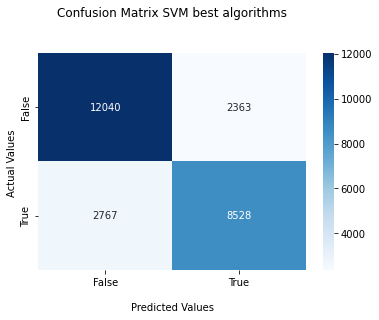

In [57]:
cf_matrix_svm_2= confusion_matrix(val_dataY, svm_pred_val)

ax = sns.heatmap(cf_matrix_svm_2,annot = True,fmt = 'g', cmap='Blues')

ax.set_title('Confusion Matrix SVM best algorithms\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [56]:
print("% of True elements well classified: ", 8528/(8528+2767))
print("% of False elements well classified: ", 12040/(12040+2363))

% of True elements well classified:  0.7550243470562196
% of False elements well classified:  0.8359369575782823


## Gradient Boosting

In [24]:
trainX_100 =  train_100_samples.loc[ : , train_100_samples.columns != 'satisfaction']
valX_100 =  val_100_samples.loc[ : , val_100_samples.columns != 'satisfaction']
trainY_100 = train_100_samples.loc[ : , train_100_samples.columns == 'satisfaction']
valY_100 = val_100_samples.loc[ : , val_100_samples.columns == 'satisfaction']

estimators_param = [100,200,300,400,500]
maxDepth_param = np.linspace(1, 4, num = 4, dtype=int)
alpha_param = np.linspace(0, 1, num = 7)
estimators = []
maxDepths = []
alphas = []
recalls = []
accuracys_train = []
accuracys_val = []
recalls = []
mean_cross_vals = []
f1s = []
for i in estimators_param:
    for j in maxDepth_param:
        for k in alpha_param:
            xgboost = XGBClassifier(max_depth=j, reg_alpha=k, n_estimators=i)
            xgboost.fit(trainX_100,trainY_100)
            xgboost_train= xgboost.predict(trainX_100)
            xgboost_val = xgboost.predict(valX_100)
            f1= f1_score(valY_100, xgboost_val, average='macro')
            accuracy_val = accuracy_score(valY_100,xgboost_val)
            accuracy_train = accuracy_score(trainY_100,xgboost_train)
            cross_val_scores = cross_val_score(xgboost, valX_100,valY_100,cv=5).mean()
            recall = recall_score(valY_100,xgboost_val)
            estimators.append(i)
            maxDepths.append(j)
            alphas.append(k)
            recalls.append(recall)
            accuracys_train.append(accuracy_train)
            accuracys_val.append(accuracy_val)
            mean_cross_vals.append(cross_val_scores)
            f1s.append(f1)
            
       
            

In [25]:
analyse_best_one_xgboost =  {'Estimators parameter': estimators ,
        'Max Depth parameter': maxDepths,
        'Alpha parameter': alphas,
        'Accuracy Training set': accuracys_train,
        'Accuracy Validation set': accuracys_val,
        'Recall score': recalls,
        'F1 score': f1s,
        'Mean Cross Validation': mean_cross_vals,
        }

analyses_xbg_100_samples = pd.DataFrame(analyse_best_one_xgboost)
analyses_xbg_100_samples.sort_values(by=['Accuracy Validation set'],ascending=False)


,Estimators parameter,Max Depth parameter,Alpha parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
93,400,2,0.333333,1.00,0.93,0.901961,0.929993,0.92
104,400,3,1.000000,1.00,0.93,0.882353,0.929937,0.92
122,500,2,0.500000,1.00,0.93,0.901961,0.929993,0.93
20,100,3,1.000000,1.00,0.93,0.882353,0.929937,0.91
48,200,3,1.000000,1.00,0.93,0.882353,0.929937,0.92
...,...,...,...,...,...,...,...,...
59,300,1,0.500000,0.95,0.89,0.843137,0.889901,0.92
116,500,1,0.666667,0.95,0.89,0.843137,0.889901,0.92
31,200,1,0.500000,0.95,0.88,0.823529,0.879808,0.92
30,200,1,0.333333,0.95,0.88,0.823529,0.879808,0.91


In [52]:
xgboost_best = XGBClassifier(max_depth=2, reg_alpha=0.333333, n_estimators=400)
xgboost_best.fit(train_dataX,train_dataY)
xgboost_best_train= xgboost.predict(train_dataX)
xgboost_best_val = xgboost.predict(val_dataX)
f1= f1_score(val_dataY, xgboost_best_val, average='macro')
accuracy_val = accuracy_score(val_dataY, xgboost_best_val)
accuracy_train = accuracy_score(train_dataY,xgboost_best_train)
cross_val_scores = cross_val_score(xgboost_best, val_dataX,val_dataY,cv=5).mean()
recall = recall_score(val_dataY, xgboost_best_val)

In [28]:
analyse_best_one =  {'Estimators parameter': np.array([400]) ,
        'Max Depth parameter': np.array([2]),
        'Alpha parameter': np.array([0.333333]),
        'Accuracy Training set': np.array([accuracy_train]),
        'Accuracy Validation set': np.array([accuracy_val]),
        'Recall score': np.array([recall]),
        'F1 score': np.array([f1]),
        'Mean Cross Validation': np.array([cross_val_scores]),
        }

analyse_best_one_xg = pd.DataFrame(analyse_best_one)
analyse_best_one_xg

,Estimators parameter,Max Depth parameter,Alpha parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
0,400,2,0.333333,0.867786,0.864853,0.78008,0.860374,0.94626


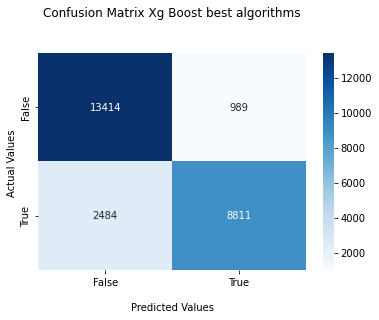

In [53]:
cf_matrix_xg= confusion_matrix(val_dataY, xgboost_best_val)

ax = sns.heatmap(cf_matrix_xg,annot = True,fmt = 'g', cmap='Blues')

ax.set_title('Confusion Matrix Xg Boost best algorithms\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [54]:
print("% of True elements well classified: ", 8811/(8811+2484))
print("% of False elements well classified: ", 13414/(13414+989))

% of True elements well classified:  0.7800796812749003
% of False elements well classified:  0.9313337499132125


In [29]:
xgboost_best = XGBClassifier(max_depth=2, reg_alpha=0.5, n_estimators=500)
xgboost_best.fit(train_dataX,train_dataY)
xgboost_best_train= xgboost.predict(train_dataX)
xgboost_best_val = xgboost.predict(val_dataX)
f1= f1_score(val_dataY, xgboost_best_val, average='macro')
accuracy_val = accuracy_score(val_dataY, xgboost_best_val)
accuracy_train = accuracy_score(train_dataY,xgboost_best_train)
cross_val_scores = cross_val_score(xgboost_best, val_dataX,val_dataY,cv=5).mean()
recall = recall_score(val_dataY, xgboost_best_val)

In [31]:
analyse_best_two =  {'Estimators parameter': np.array([500]) ,
        'Max Depth parameter': np.array([2]),
        'Alpha parameter': np.array([0.5]),
        'Accuracy Training set': np.array([accuracy_train]),
        'Accuracy Validation set': np.array([accuracy_val]),
        'Recall score': np.array([recall]),
        'F1 score': np.array([f1]),
        'Mean Cross Validation': np.array([cross_val_scores]),
        }

analyse_best_two_xg = pd.DataFrame(analyse_best_two)
analyse_best_two_xg

,Estimators parameter,Max Depth parameter,Alpha parameter,Accuracy Training set,Accuracy Validation set,Recall score,F1 score,Mean Cross Validation
0,500,2,0.5,0.867786,0.864853,0.78008,0.860374,0.946416


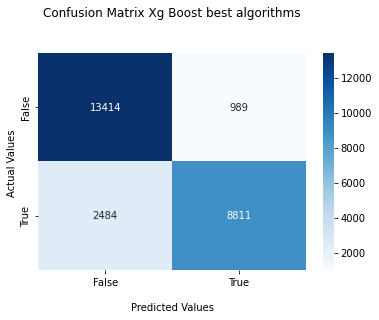

In [50]:
cf_matrix_xg_2= confusion_matrix(val_dataY, xgboost_best_val)

ax = sns.heatmap(cf_matrix_xg_2,annot = True,fmt = 'g', cmap='Blues')

ax.set_title('Confusion Matrix Xg Boost best algorithms\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [51]:
print("% of True elements well classified: ", 8811/(8811+2484))
print("% of False elements well classified: ", 13414/(13414+989))

% of True elements well classified:  0.7800796812749003
% of False elements well classified:  0.9313337499132125


## Saving the models

In [66]:
from google.colab import drive
drive.mount('/content/drive')
best_linear_svm_1 = BaggingClassifier(LinearSVC(C= 6.923385), max_samples=1.0 / 10, n_estimators=10, n_jobs=-1)
best_linear_svm_1.fit(train_dataX,train_dataY)
with open("drive/MyDrive/Colab Notebooks/best_linear_svm_1.pickle","wb") as f:
    pickle.dump(best_linear_svm_1, f)

best_linear_svm_2 = BaggingClassifier(LinearSVC(C= 6.154231), max_samples=1.0 / 10, n_estimators=10, n_jobs=-1)
best_linear_svm_2.fit(train_dataX,train_dataY)
with open("drive/MyDrive/Colab Notebooks/best_linear_svm_2.pickle","wb") as f:
    pickle.dump(best_linear_svm_2, f)

xgboost_best_1 = XGBClassifier(max_depth=2, reg_alpha=0.333333, n_estimators=400)
xgboost_best_1.fit(train_dataX,train_dataY)
with open("drive/MyDrive/Colab Notebooks/xgboost_best_1.pickle","wb") as f:
    pickle.dump(xgboost_best_1, f)


xgboost_best_2 = XGBClassifier(max_depth=2, reg_alpha=0.5, n_estimators=500)
xgboost_best_2.fit(train_dataX,train_dataY)
with open("drive/MyDrive/Colab Notebooks/xgboost_best_2.pickle","wb") as f:
    pickle.dump(xgboost_best_2, f)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
